0       Premium
1       Premium
2       Premium
3          High
4       Premium
         ...   
4320    Premium
4321    Premium
4322    Premium
4323     Medium
4324    Premium
Name: PriceCategory, Length: 4325, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Premium']
Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')
   Brand_Amul  Brand_Britannia Industries  Brand_Dodla Dairy  \
0       False                       False               True   
1        True         

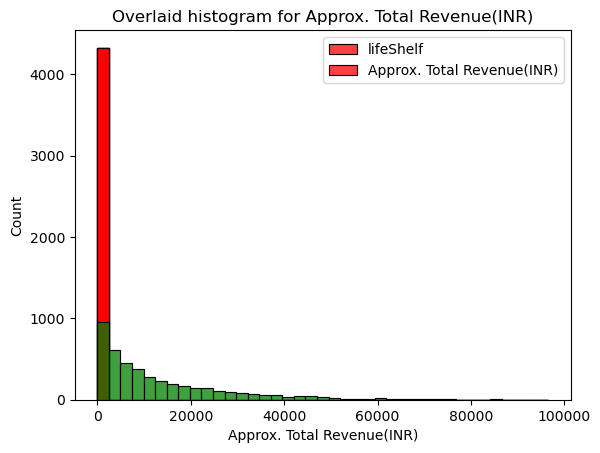

In [7]:
import pandas as pd
import json
import sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

goods_df = pd.read_csv("files to parse/dairy_dataset.csv")
inf = float("inf")

goods_df["LandAreaCategory"] = pd.cut(goods_df["Total Land Area (acres)"], bins=[0,50,100,200, inf], labels=["Small", "Medium", "Large", "Extra Large"])

goods_df["PriceCategory"] = pd.cut(goods_df["Price per Unit"], bins = [0, 10, 20, 30, inf], labels = ["Low", "Medium", "High", "Premium"])
print(goods_df["PriceCategory"])

df_col = pd.read_csv("files to parse/dairy_dataset.csv").columns
print(df_col)
brand_dummies = pd.get_dummies(goods_df['Brand'], prefix='Brand')
print(brand_dummies.head())

goods_df["ShelfLifeCategory"] = pd.cut(goods_df["Shelf Life (days)"], bins=[0,7,14,30, inf], labels=["Short", "Medium", "Long", "Very Long"])
print(df_col)

lifeShelf = list(goods_df["Shelf Life (days)"])
sweetness =list(goods_df['Price per Unit'])
size = list(goods_df['Total Value'])
weight =list(goods_df['Quantity Sold (liters/kg)'])
crunchiness =list(goods_df['Price per Unit (sold)'])
juiciness =list(goods_df['Approx. Total Revenue(INR)'])
xmin = min(min(size),min(weight),min(sweetness),min(crunchiness),min(juiciness))
xmax = max(max(size),max(weight),max(sweetness),max(crunchiness),max(juiciness))
width = (xmax - xmin) / 40

for i in ['Price per Unit','Total Value','Quantity Sold (liters/kg)','Price per Unit (sold)','Approx. Total Revenue(INR)']:

    sns.histplot(lifeShelf, color='r', kde=False, bins=np.arange(xmin, xmax, width))
sns.histplot(goods_df[i], color = 'g', kde = False, bins=np.arange(xmin, xmax, width))
plt.legend(['lifeShelf', '{}'.format(i)])
plt.title('Overlaid histogram for {}'.format(i))
plt.show()